In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Getting Started** 

**Title : Diabetes Prediction Prediction**
  
  **Diabetes Prediction Status :**

  0 --> no
  1 -->  yes



### **DataFraming**

**Read .csv file into pandas**

In [94]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Exploratory data analysis**

In [95]:
#Shape of data 
print(data.shape)
#dtypes of data 
print(data.dtypes)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [96]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [97]:
# Checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Checking Duplicates**

In [6]:
data.duplicated().sum()

0

### **Dropping Duplicates**

In [7]:
data = data.drop_duplicates()

# **Transformation**

In [8]:
# Value_counts of output
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

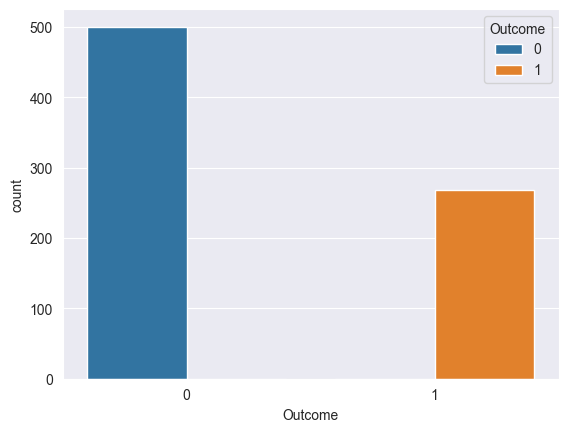

In [9]:
# output & output Count
import seaborn as sns
sns.countplot(x='Outcome',hue='Outcome',data=data)

<Axes: xlabel='Age', ylabel='count'>

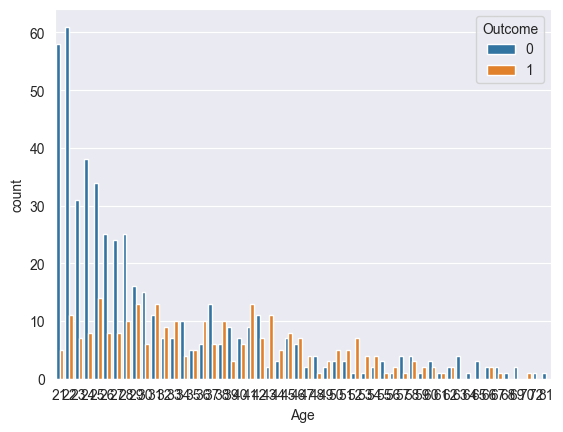

In [10]:
# age & output
import seaborn as sns
sns.countplot(x='Age',hue='Outcome',data=data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28616\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28616\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_286

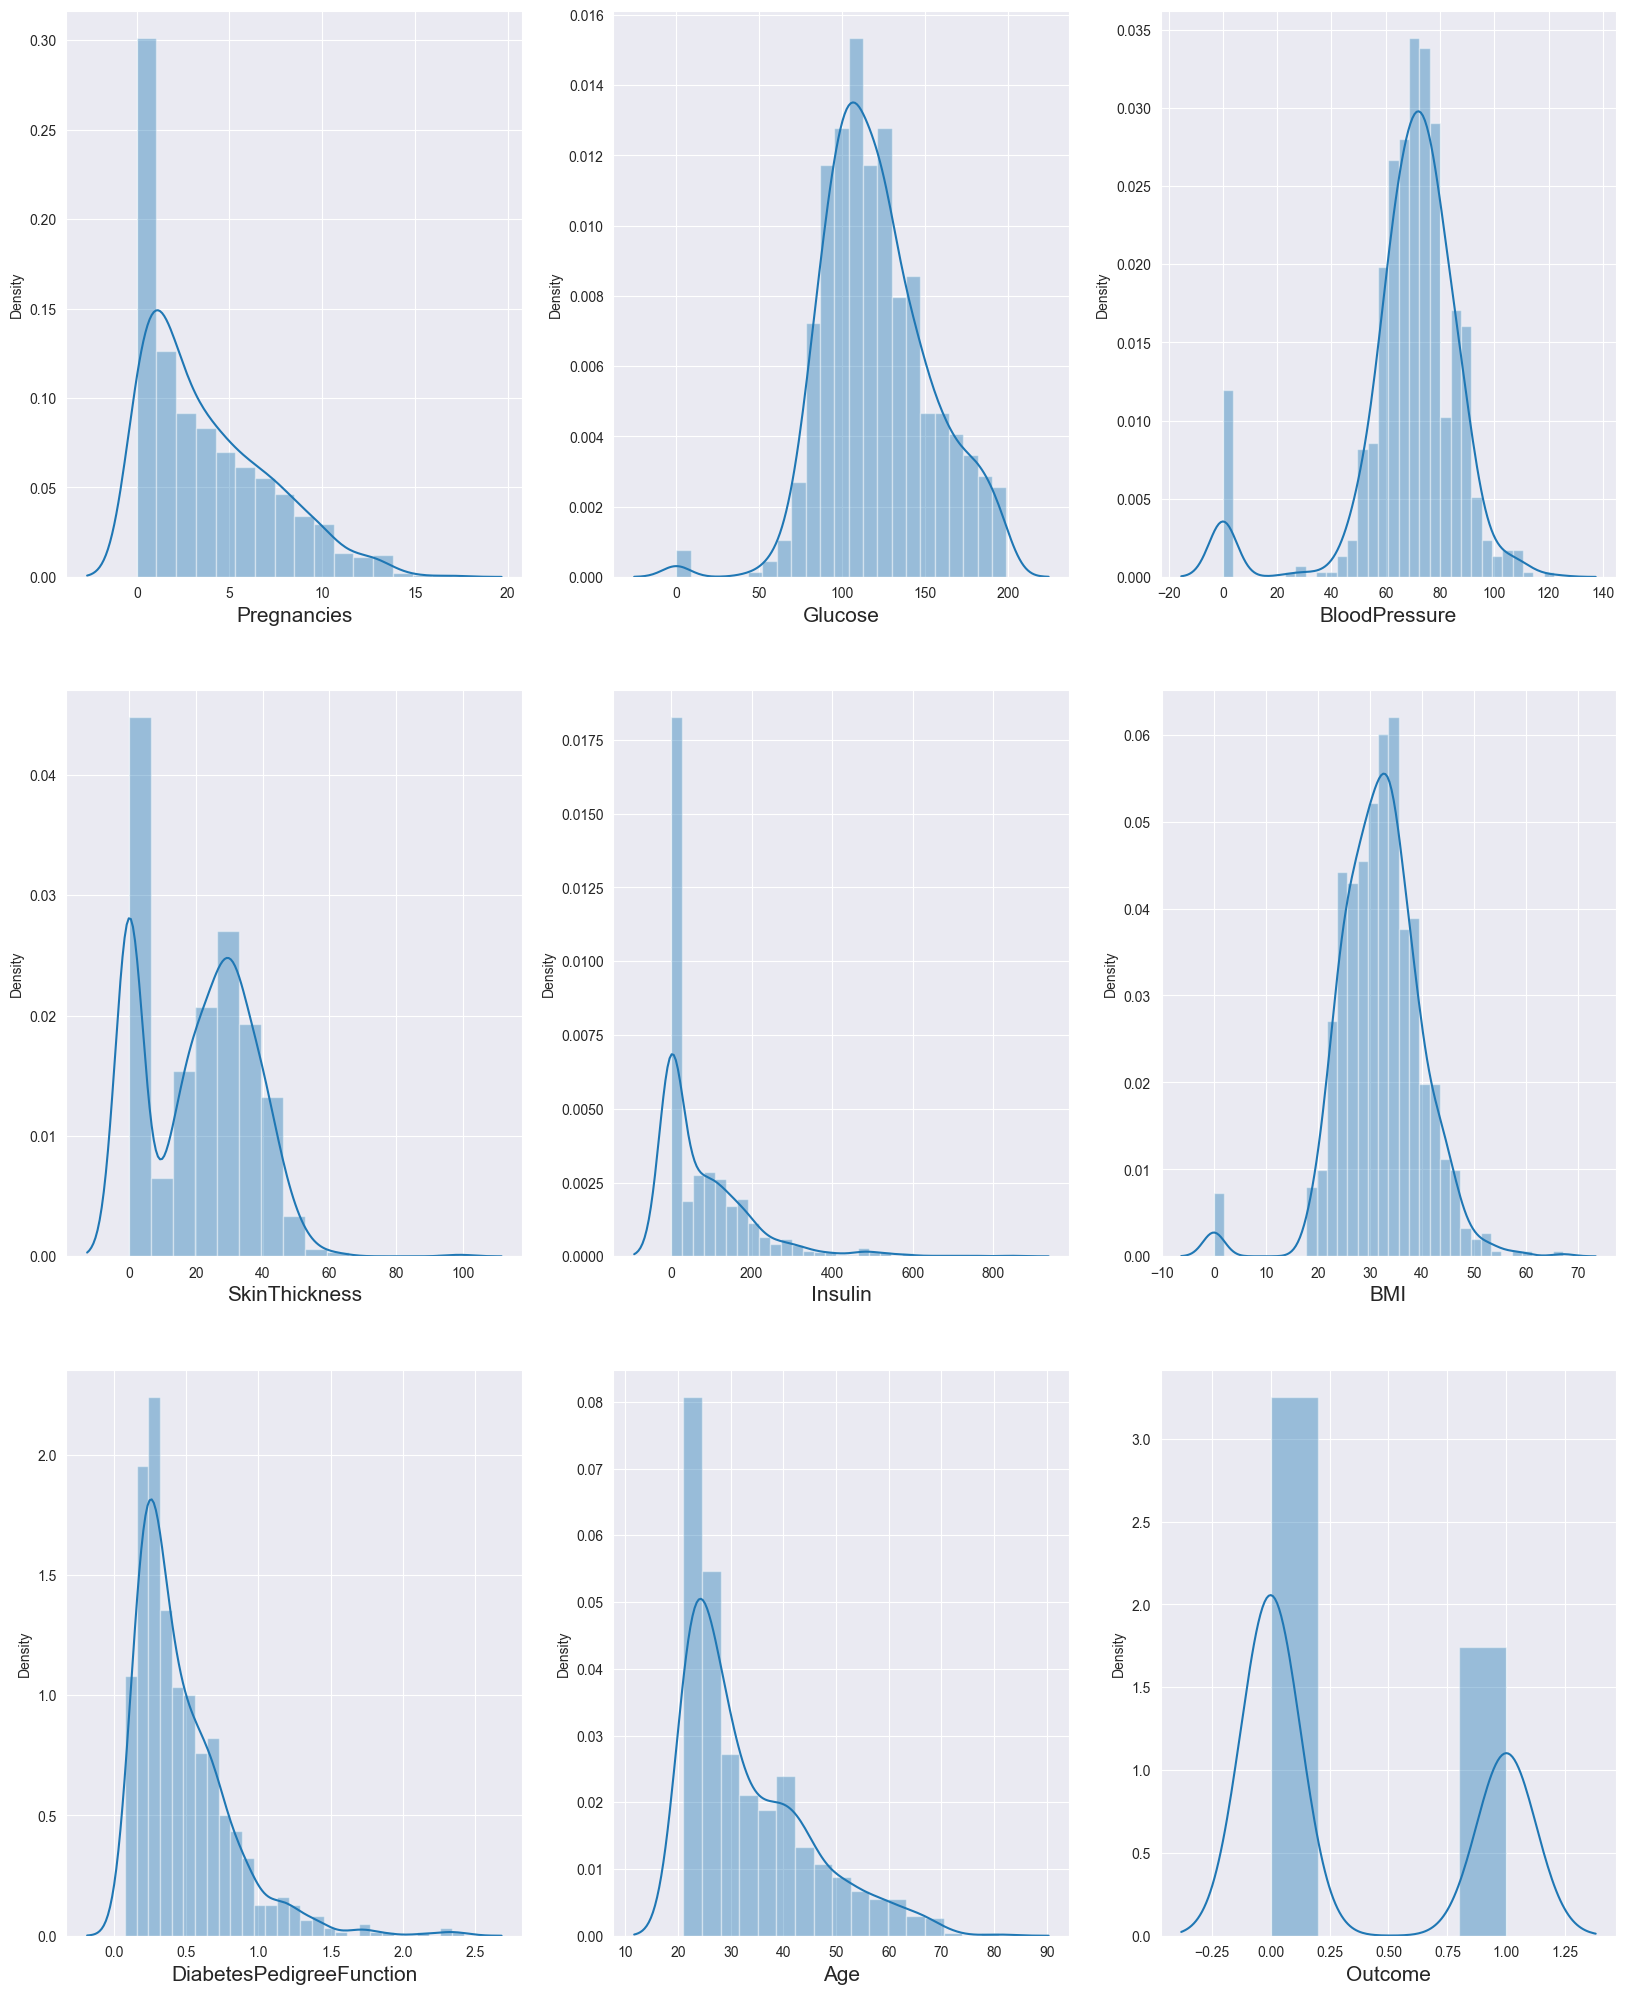

In [11]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

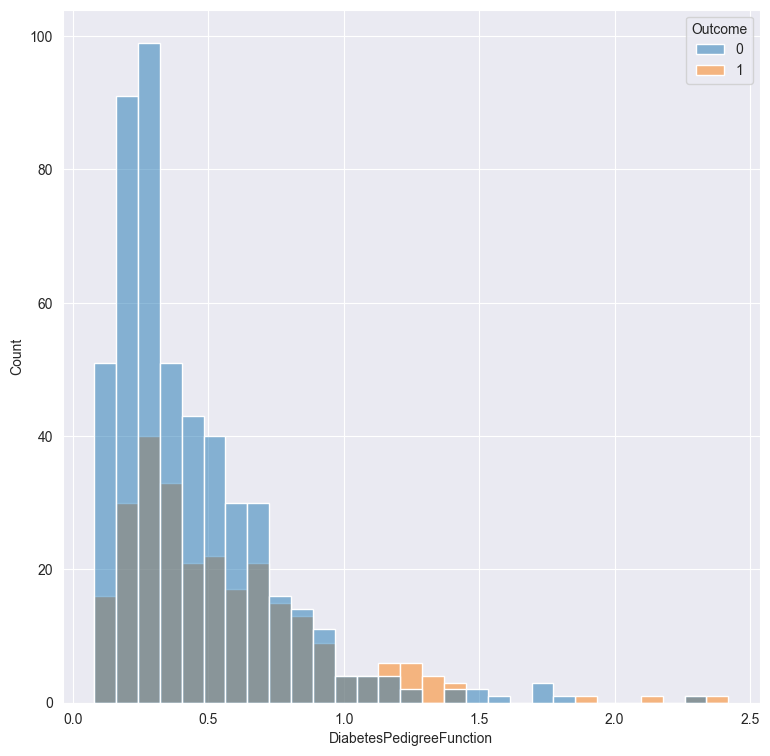

In [12]:
plt.figure(figsize=(9,9))
sns.histplot(data[['DiabetesPedigreeFunction', 'Outcome']], x = "DiabetesPedigreeFunction", hue="Outcome")
plt.title("")
plt.show()

**We can see that the distribution of data is normal ! lets move for the Model preparation.** 🚀

### Find Correlations in Data Set

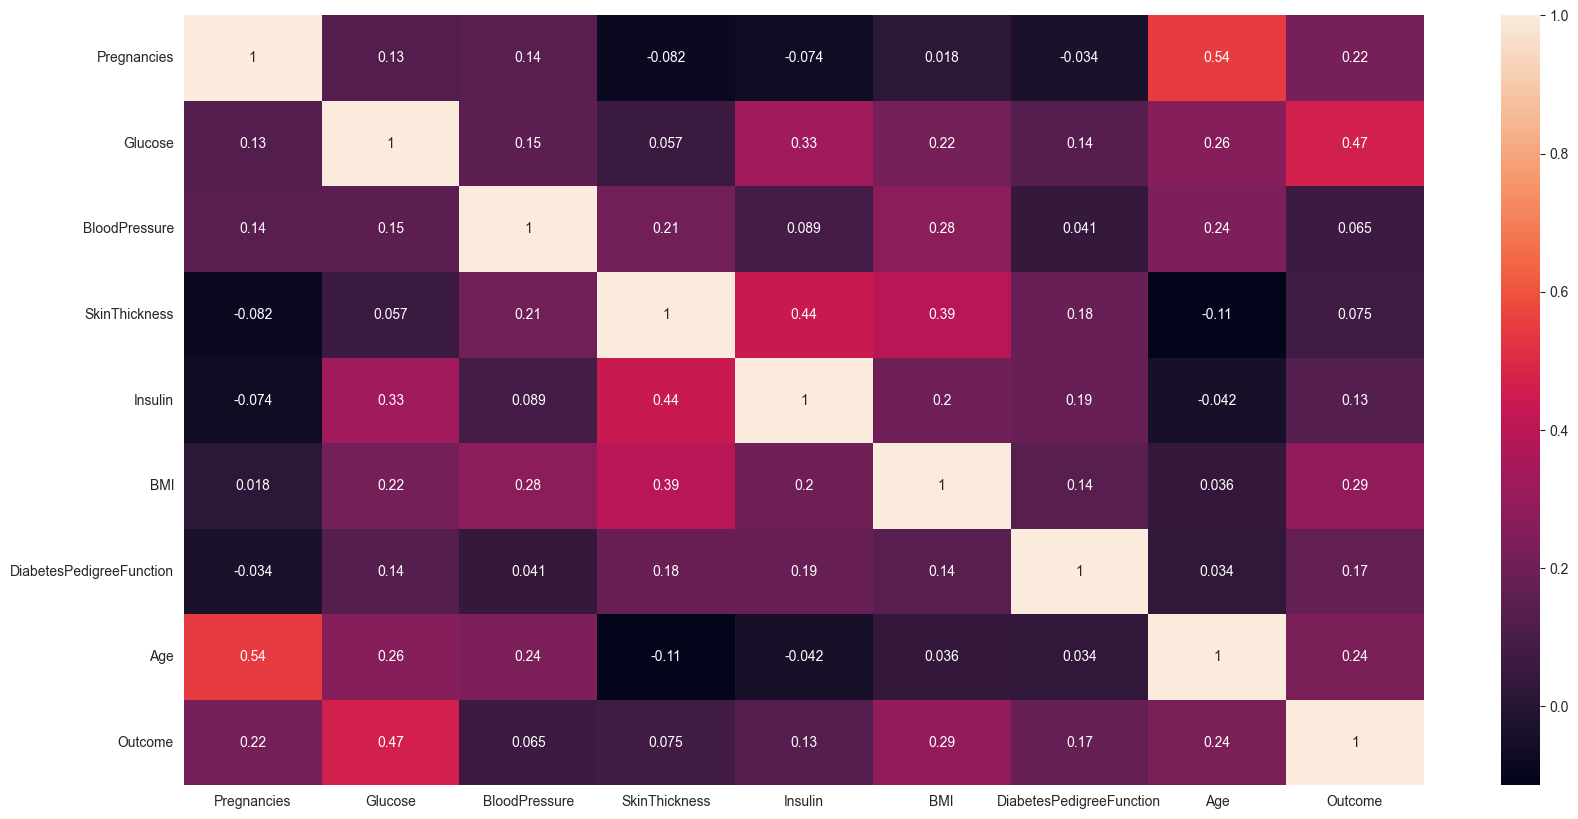

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);
plt.show()

# **Model Preparation**

Spilt into X & Y

In [14]:
# separating the data and target
X = data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']

In [15]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , y.shape)

The shape of X is  (768, 8)
The shape of Y is  (768,)


In [16]:
from sklearn.model_selection import train_test_split
# separating into train and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (614, 8)
Shape of X_test  is  (154, 8)
Shape of Y_train is  (614,)
Shape of Y_test  is  (154,)


In [17]:
# After statify Y train & test values
print(Y_train.value_counts())
print(Y_test.value_counts())

Outcome
0    400
1    214
Name: count, dtype: int64
Outcome
0    100
1     54
Name: count, dtype: int64


# **Feature Scalilng**

In [18]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

In [20]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=100)
randf.fit(X_train,Y_train)
y_pred=randf.predict(X_test)

In [21]:
randf.feature_importances_

array([0.0845858 , 0.27166673, 0.0862842 , 0.07214686, 0.07295804,
       0.16234675, 0.11973907, 0.13027255])

In [22]:
features = data.columns.values.tolist()[0:8] #Dropping Dependent Variable Heart Attack dataset
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [23]:
feature_pro 

Glucose                     0.271667
BMI                         0.162347
Age                         0.130273
DiabetesPedigreeFunction    0.119739
BloodPressure               0.086284
Pregnancies                 0.084586
Insulin                     0.072958
SkinThickness               0.072147
dtype: float64

## Feature Importances Vizualizing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


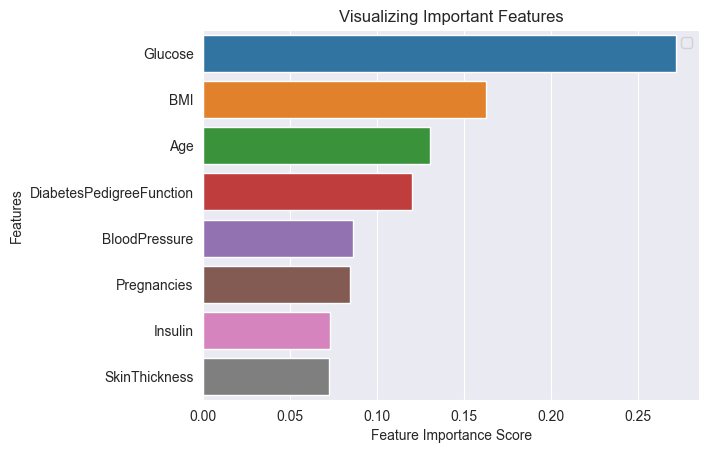

In [24]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Model Training**

**We will train different model after the evaluation of model we will select out best model for production.**

1.   Logistic Regression
2.   KNN
3.   SVC
3.   Decision Tree
4.   Random Forest Regressor
5.   XgBoost
6.   Gradient Boosting


## **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7915309446254072
Test Accuracy of Logistic Regression Model is 0.7142857142857143


In [26]:
# confusion matrix 
confusion_matrix(Y_test, y_pred)

array([[82, 18],
       [26, 28]], dtype=int64)

In [27]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## **SVC**


In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8355048859934854
Test Accuracy of SVC Model is 0.7532467532467533


In [29]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[83, 17],
       [21, 33]], dtype=int64)

In [30]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## **DecisionTreeClassifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.7207792207792207


In [32]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[86, 14],
       [29, 25]], dtype=int64)

In [33]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.64      0.46      0.54        54

    accuracy                           0.72       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154



## **Hyper parameter tuning**

In [34]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],

    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [35]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.7606690657070506


In [36]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.760586319218241
Test Accuracy of Decesion Tree Model is 0.6948051948051948


**Visualization the DTC tree.**

[Text(0.5, 0.875, 'x[1] <= 1.065\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.25, 0.625, 'x[5] <= -0.665\nentropy = 0.818\nsamples = 515\nvalue = [384, 131]'),
 Text(0.125, 0.375, 'x[0] <= -0.398\nentropy = 0.244\nsamples = 124\nvalue = [119, 5]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.445\nsamples = 54\nvalue = [49, 5]'),
 Text(0.375, 0.375, 'x[7] <= -0.242\nentropy = 0.907\nsamples = 391\nvalue = [265, 126]'),
 Text(0.3125, 0.125, 'entropy = 0.729\nsamples = 211\nvalue = [168, 43]'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 180\nvalue = [97, 83]'),
 Text(0.75, 0.625, 'x[0] <= 0.81\nentropy = 0.638\nsamples = 99\nvalue = [16, 83]'),
 Text(0.625, 0.375, 'x[5] <= -0.27\nentropy = 0.767\nsamples = 67\nvalue = [15, 52]'),
 Text(0.5625, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.65\nsamples = 54\nvalue = [9, 45]'),
 Text(0.875, 0.375, 'x[7] <= 0.519\ne

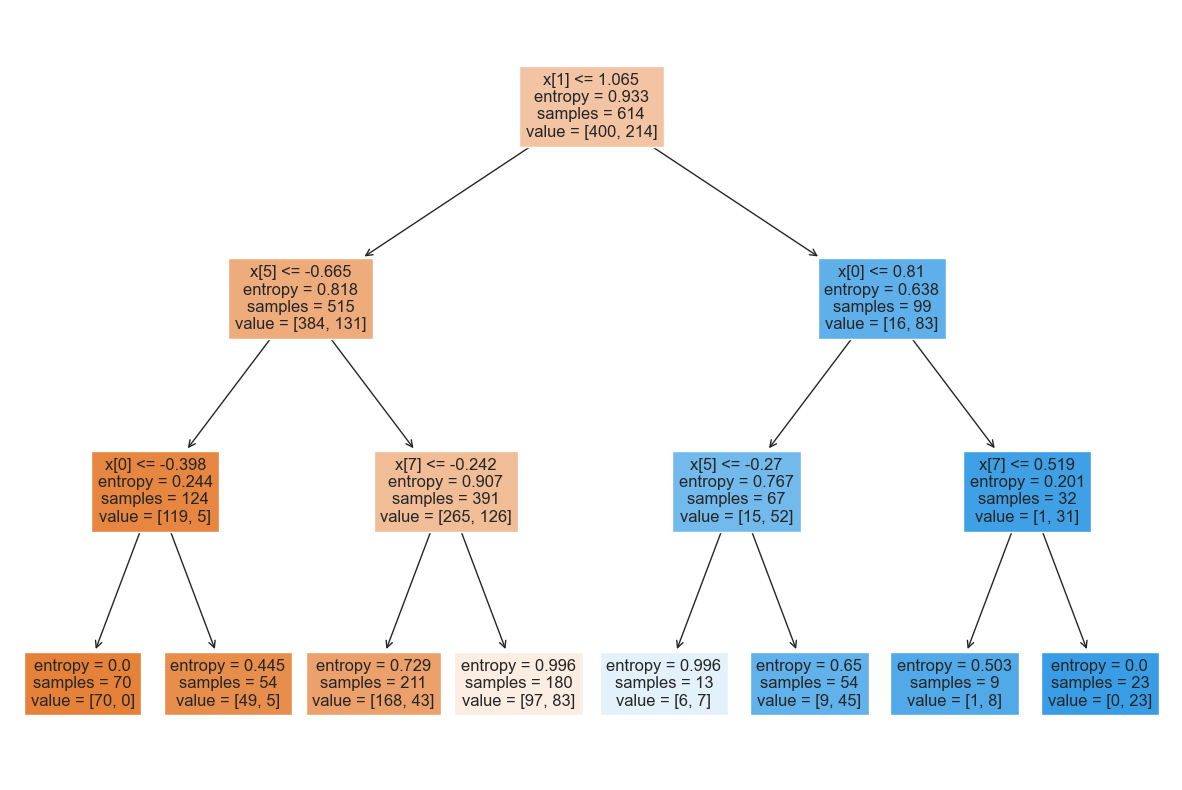

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [38]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Random Forest Classifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, Y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8045602605863192
Test Accuracy of Random Forest Model is 0.7272727272727273


## **KNN**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=16)
kfitModel = k_model.fit(X_train, Y_train)

# accuracy score on training data

kX_train_prediction = kfitModel.predict(X_train)
training_data_accuray = accuracy_score(kX_train_prediction,Y_train)
print('Accuracy on training data  : ', training_data_accuray)

# accuracy score on testing data
kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,Y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.7866449511400652
Accuracy on test data      :  0.7337662337662337


## **GradientBoostingClassifier**

In [41]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [42]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}
0.7589897374383581


In [43]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train, Y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(Y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 1.0
Test Accuracy of Gradient Boosting Classifier Model is 0.7012987012987013


In [44]:
# confusion matrix

confusion_matrix(Y_test, y_pred)

array([[76, 24],
       [22, 32]], dtype=int64)

In [45]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       100
           1       0.57      0.59      0.58        54

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.70      0.70       154



## **XGB Classifier**

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.7947882736156352
Test Accuracy of XGB Model is 0.7142857142857143


In [47]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Gradient Boosting', 'XgBoost']
scores = [lr_test_acc, kx_lgr_test_data_accuray, svc_test_acc, dtc_test_acc, rand_clf_test_acc,gb_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.753247
1,KNN,0.733766
4,Random Forest,0.727273
0,Logistic Regression,0.714286
6,XgBoost,0.714286
5,Gradient Boosting,0.701299
3,Decision Tree,0.694805


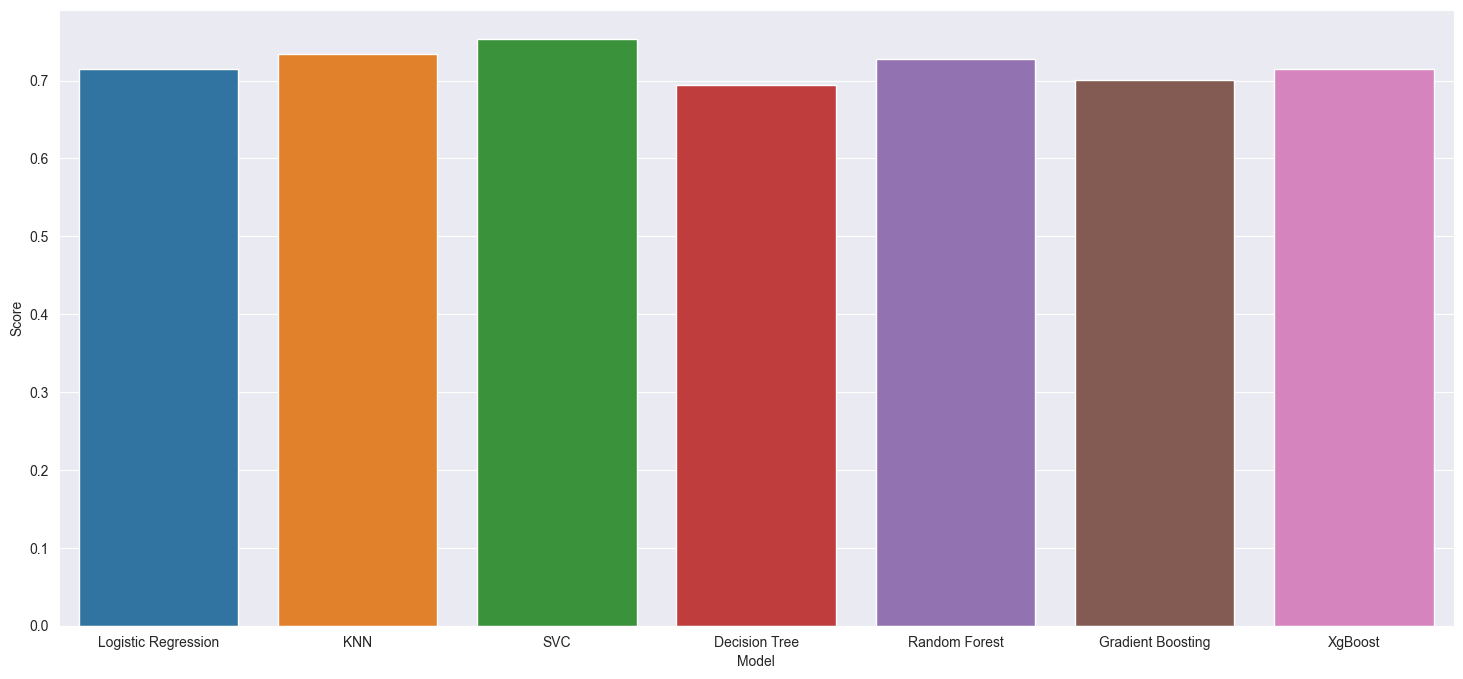

In [48]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### ***SVC gives us the best result so we will save this model for production but it overfited then i select Random Forest .***

In [49]:
import pickle

In [50]:
# save the model to disk
filename = 'diabetes_model.sav'
pickle.dump(models, open(filename, 'wb'))

In [51]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score
0,Logistic Regression,0.714286
1,KNN,0.733766
2,SVC,0.753247
3,Decision Tree,0.694805
4,Random Forest,0.727273
5,Gradient Boosting,0.701299
6,XgBoost,0.714286


## Create Pickle File for Random Forest Model

In [55]:
import pickle
# open a file, where you ant to store the data
file = open('diabetes_model.pkl', 'wb')

# dump information to that file
# lr
# svc
# dtc -
# grid_search
# k_model
# gb
# xgb
pickle.dump(dtc, file)  #Selecting Random Forest as the Model because of Giving highest Accuracy after svc

In [56]:
#Reading the Pickle file for to certify model was imported Successfully
model = open('diabetes_model.pkl','rb')
lrModel= pickle.load(model)

In [57]:
# Prediction Parameters testing using the imported Model
y_prediction = lrModel.predict(X_test)

In [58]:
svc_acc = accuracy_score(Y_test, y_prediction)

In [59]:
svc_acc

0.6948051948051948

In [60]:
## Example for Predicting the Heart Attack Analysis
import numpy as np

 #More chance
X_New = [6,148,72,35,0,33.6,0.627,50]
X_New = np.reshape(X_New, (1, -1))

y_New = lrModel.predict(X_New)


#Less chance
X_2 = [10,115,0,0,0,35.3,0.134,29]
X_2 = np.reshape(X_2, (1, -1))

y_2 = lrModel.predict(X_2)

In [61]:
print(y_New)


[1]


In [62]:
print(y_2)

[1]


## ***.hy file***

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [81]:
# Save the model to a .hy file
file = open('diabatic_model.hy', 'wb')
joblib.dump(rand_clf, file)
# file.close()

# Load the model from the .hy file
model = open('diabatic_model.hy', 'rb')
loaded_model = joblib.load(model)
# model.close()

# Assuming X_test is your test data
predictions = loaded_model.predict(X_test)

In [82]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy of the loaded model is {accuracy}")

Accuracy of the loaded model is 0.7272727272727273


**So this will Verify that Our Imported hy file provides the desired out put for the Heart Attack Analysis & Prediction Dataset for Prdiction Purpose**

In [88]:
import numpy as np
import joblib

In [89]:
loaded_model = joblib.load('diabatic_model.hy')

In [90]:
X_New = np.array([10,115,0,0,0,35.3,0.134,29])
X_New = np.reshape(X_New, (1, -1))

In [91]:
y_New = loaded_model.predict(X_New)

In [92]:
if y_New == 0:
    print("Less chance of Diabatic")
else:
    print("More chance of Diabatic")

More chance of Diabatic
